state['air_temperature'] =  <xarray.DataArray 'air_temperature' (mid_levels: 5, lat: 3, lon: 1)>
array([[[290.],
        [290.],
        [290.]],

       [[290.],
        [290.],
        [290.]],

       [[290.],
        [290.],
        [290.]],

       [[290.],
        [290.],
        [290.]],

       [[290.],
        [290.],
        [290.]]])
Dimensions without coordinates: mid_levels, lat, lon
Attributes:
    units:    degK
state_degC =  <xarray.DataArray 'air_temperature' (mid_levels: 5, lat: 3, lon: 1)>
array([[[16.85],
        [16.85],
        [16.85]],

       [[16.85],
        [16.85],
        [16.85]],

       [[16.85],
        [16.85],
        [16.85]],

       [[16.85],
        [16.85],
        [16.85]],

       [[16.85],
        [16.85],
        [16.85]]])
Dimensions without coordinates: mid_levels, lat, lon
Attributes:
    units:    degC
<class 'numpy.ndarray'>
<xarray.DataArray 'air_temperature' (mid_levels: 5, lat: 3, lon: 1)>
array([[[291.],
        [291.],
        [291

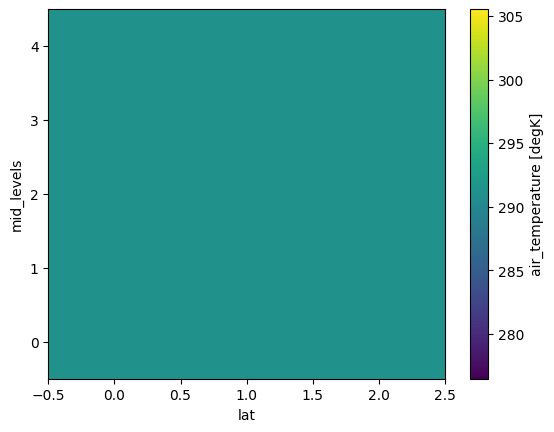

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 28 09:45:01 2024

@author: adamh
"""

#imports
import climt as cl
import matplotlib.pyplot as plt
import numpy as np

#========================== MODEL STATE ==========================

radiation = cl.GrayLongwaveRadiation()
convection = cl.DryConvectiveAdjustment() #moisture processes are less significant (mostly adiabatic processes)

#Tell climt what the model dimensions are
grid = cl.get_grid(nx=None, ny=3, nz=5)

#Get state dictionary filled with required quantities for the components to run
state = cl.get_default_state([radiation, convection], grid_state=grid)

print("state['air_temperature'] = ", state['air_temperature'])

#Can change units easily
state_degC = state['air_temperature'].to_units('degC')
print("state_degC = ", state_degC)

#DataArrays are a user-friendly way of handling numerical or numpy arrays. The numpy array underlying 
#any DataArray is easily accessed using the values attribute:
print(type(state['air_temperature'].values))

#Values are easily modifiable:
state['air_temperature'].values[:] = 291
print(state['air_temperature'])

#Can perform any of the functions supported by xarry on the model satte quantities
print(state['air_temperature'].sum())

#Can also directly plot DataArrays
state['air_temperature'].plot()

#========================== MODEL COMPONENTS ==========================

#Components are representations of physical processes

#All components take some inputs from the model state, and return outputs or 
#tendencies along with diagnostics (if any).

#Diagnostics are quantities computed while calculating outputs or tendencies. 
#For example, a radiation component calculates heating rates. However, in the process 
#of calculating these heating rates, it also calculates the radiative flux at each 
#interface level.

#These are the tendencies returned by radiation
print(radiation.tendency_properties)

#These are the diagnostics returned by radiation
print(radiation.diagnostic_properties)

#NOTE:No component will return both outputs and tendencies. The tendency of a quantity 
#X is given by dXdt, and so the units of a quantity returned as a tendency will always 
#have per second as as suffix: i.e, if a component is returning air_temperature as a tendency,
#then its units will be degK/s.